Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Exercise 2 - Reading and manipulating FITS files
#### (M. Razzano, Feb 10, 2023)

In this exercise you will have to read and manipulate a file coming from the second catalog of gamma-ray pulsars observed by the Fermi Large Area Telescope. 
For your information, you can find more details (not fundamental for this exercise) at this page:
https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/

### Basic Setup
In the cell below you should import the modules that you think you will require...

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

#Work directory
work_dir = os.getcwd()
print("Work dir %s" % work_dir)

#find main directory
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#find data directory
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

#Create result
results_dir = os.path.join(main_dir,"results")
##if the directory does not exist, you can create it
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

Work dir /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/exercises
Main directory is /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa
data dir is /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data


### Open and explore  data file

The file, named *2PC_catalog_v04.fits*, is already in the data directory. Define a work, data and results directories, and open the file
Open it and look how many HDUs there are. Select the HDU1 (PULSAR_CATALOG). How many entries are in the header? How many likes contains the table?

In [3]:
import glob

#in glob we put the items to seach, such as: data/*fits
fits_file_list = glob.glob(os.path.join(data_dir,"*.fits"))

#here we go!
print(fits_file_list)

#define the input file
input_filename = os.path.join(data_dir,"2PC_catalog_v04.fits")

#First, you can open the file and check the information contained in it
fits_info = fits.open(input_filename)

#the number of HDU, in this case 4
fits_info.info()

['/home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data/horse_head_image.fits', '/home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data/2PC_catalog_v04.fits', '/home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data/lat_photons_3c279.fits', '/home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data/fermi_lat_3fgl_gll_psc_v16.fits']
Filename: /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data/2PC_catalog_v04.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  PULSAR_CATALOG    1 BinTableHDU    402   117R x 88C   [11A, E, E, E, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 3A, I, E, E, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, 2A, E, E, E, 

In [4]:
#Now, we want to read the HDU 1. We can do by specifying the "ext" parameter
data, header = fits.getdata(input_filename, ext=1,header=True)

#and we can look at the header
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  347 / width of table in bytes                        
NAXIS2  =                  117 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   88 / number of fields in each row                   
TTYPE1  = 'PSR_Name'           / Pulsar name                                    
TFORM1  = '11A     '           / data format of field: ASCII Character          
TTYPE2  = 'RAJ2000 '           / Right Ascension (J2000)                        
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TUNIT2  = 'deg     '        

### Extract information from the catalog

On the HDU of the catalog, what are the column names? How many pulsars with period less than 20 milliseconds (Millisecond pulsars, MSPs) are in the catalog?

In [5]:
#We can access all the header information
header["TTYPE1"]
#We will look at the EVENTS table (HDU=1)
table_header = fits_info[1].header
table_data = fits_info[1].data
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  347 / width of table in bytes                        
NAXIS2  =                  117 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   88 / number of fields in each row                   
TTYPE1  = 'PSR_Name'           / Pulsar name                                    
TFORM1  = '11A     '           / data format of field: ASCII Character          
TTYPE2  = 'RAJ2000 '           / Right Ascension (J2000)                        
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TUNIT2  = 'deg     '        

In [6]:
#we can access the columns definitions
fits_info[1].columns

ColDefs(
    name = 'PSR_Name'; format = '11A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F6.2'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F6.2'
    name = 'Period'; format = 'E'; unit = 'ms'; disp = 'F6.2'
    name = 'P_Dot'; format = 'E'; unit = 's/s'; disp = 'E10.4'
    name = 'E_Dot'; format = 'D'; unit = 'erg/s'; disp = 'E10.5'
    name = 'F100'; format = 'E'; unit = 'ph/cm**2/s'; disp = 'E10.4'
    name = 'Unc_F100'; format = 'E'; unit = 'ph/cm**2/s'; disp = 'E9.3'
    name = 'G100'; format = 'E'; unit = 'erg/cm**2/s'; disp = 'E10.4'
    name = 'Unc_G100'; format = 'E'; unit = 'erg/cm**2/s'; disp = 'E7.1'
    name = 'TS_DC'; format = 'E'; disp = 'F7.0'
    name = 'TS_Cutoff'; format = 'E'; disp = 'F7.0'
    name = 'TS_bfree'; format = 'E'; disp = 'F7.0'
    name = 'Photon_Index'; format = 'E'; disp = 'F5.3'
    name = 'Unc_Photon_

In [7]:
#Now we convert the data to an Astropy Table object
from astropy.table import Table

evt_data = Table(table_data)
print("Data contains %d events" % len(evt_data))

Data contains 117 events


In [8]:
evt_data

PSR_Name,RAJ2000,DEJ2000,GLON,GLAT,Period,P_Dot,E_Dot,F100,Unc_F100,G100,Unc_G100,TS_DC,TS_Cutoff,TS_bfree,Photon_Index,Unc_Photon_Index,Cutoff,Unc_Cutoff,Distance,Neg_Unc_Distance,Pos_Unc_Distance,UL_Distance,Distance_Method,Distance_Ref,Prop_Motion,Unc_Prop_Motion,Prop_Motion_Ref,P_Dot_Int,Neg_Unc_P_Dot_Int,Pos_Unc_P_Dot_Int,E_Dot_Int,Neg_Unc_E_Dot_Int,Pos_Unc_E_Dot_Int,Luminosity,Unc_Luminosity,Neg_Sys_Luminosity,Pos_Sys_Luminosity,UL_Luminosity,Efficiency,Unc_Efficiency,Neg_Sys_Efficiency,Pos_Sys_Efficiency,UL_Efficiency,S1400,UL_S1400,S1400_Ref,Num_Peaks,Shift_Method,Radio_Lag,Unc_Radio_Lag,Peak_Sep,Unc_Peak_Sep,HWHM_P1_L,Unc_HWHM_P1_L,HWHM_P1_R,Unc_HWHM_P1_R,HWHM_P2_L,Unc_HWHM_P2_L,HWHM_P2_R,Unc_HWHM_P2_R,H_ColDensity,Neg_Unc_H_ColDensity,Pos_Unc_H_ColDensity,UL_H_ColDensity,XFlux_NonTherm,Neg_Unc_XFlux_NonTherm,Pos_Unc_XFlux_NonTherm,UL_XFlux_NonTherm,XFlux_PWN,Neg_Unc_XFlux_PWN,Pos_Unc_XFlux_PWN,X_Qual,Opt_Object,Opt_Band,Opt_Mag,LL_Opt_Mag,Extinction,Neg_Unc_Extinction,Pos_Unc_Extinction,UL_Extinction,Corr_OptFlux,Neg_Unc_Corr_OptFlux,Pos_Unc_Corr_OptFlux,UL_Corr_OptFlux,Type,Binary,History
str11,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str3,int16,float32,float32,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,str2,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,str3,str1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str3,str1,str5
J0007+7303,1.7565,73.0523,119.66,10.46,315.89,3.57e-13,4.48e+35,3.294e-07,4.5e-09,4.006e-10,4.47e-12,43388.0,1884.0,4.0,1.397,0.016,4662.0,174.1,1.4,0.3,0.3,nan,K,6,nan,nan,0,nan,nan,nan,nan,nan,nan,9.394e+34,1.048e+33,3.595e+34,4.457e+34,nan,0.2099,0.002342,0.08031,0.09958,nan,nan,0.005,78,2,,nan,nan,0.216,0.005,0.0526,0.0023,0.082,0.0378,0.0851,0.0464,0.0541,0.0029,nan,nan,nan,5e+21,9.84e-14,7e-16,7e-16,nan,2.14e-12,1.7e-14,1.4e-14,0,U,R,nan,27.6,0.92,0.42,0.49,nan,nan,nan,nan,5.4e-17,YRQ,N,Gamma
J0023+0923,5.8203,9.39,111.38,-52.85,3.05,1.09e-20,1.51e+34,1.178e-08,3.54e-09,8.01e-12,1.23e-12,131.0,16.0,7.0,1.405,0.395,1408.0,601.0,0.69,0.11,0.21,nan,DM,75,nan,nan,0,nan,nan,nan,nan,nan,nan,4.563e+32,7.007e+31,1.339e+32,3.2e+32,nan,0.03021,0.004639,0.008863,0.02118,nan,0.189,nan,75,2,o,0.375,0.0639,0.608,0.192,0.1642,0.0747,0.1284,0.0463,0.1401,0.1238,0.0776,0.1435,3.45e+21,2e+19,2e+19,nan,2.1e-14,1.7e-14,2e-14,nan,nan,nan,nan,2,BC,g,25.0,nan,nan,nan,nan,0.37,8.6e-16,0.0,0.0,nan,MSP,Y,Radio
J0030+0451,7.6143,4.861,113.14,-57.61,4.87,1.02e-20,3.62e+33,6.599e-08,3.32e-09,6.135e-11,1.82e-12,4788.0,316.0,10.0,1.211,0.072,1820.0,170.8,0.28,0.06,0.1,nan,P,87,5.7,1.1,65,1.06e-20,6.724e-23,8.121e-23,3.623e+33,2.298e+31,2.776e+31,5.755e+32,1.707e+31,2.202e+32,4.845e+32,nan,0.1589,0.004713,0.06079,0.1337,nan,0.6,nan,24,2,p,0.16,0.001,0.45,0.001,0.0068,0.001,0.039,0.0035,0.0084,0.0012,0.005,0.0009,nan,nan,nan,1.5e+22,2.55e-13,2.9e-14,2.9e-14,nan,nan,nan,nan,0,U,V,nan,27.0,0.36,0.13,0.19,nan,nan,nan,nan,6.9e-17,MSP,N,Radio
J0034-0534,8.591,-5.5769,111.49,-68.07,1.88,4.98e-21,1.72e+34,2.18e-08,2.91e-09,1.625e-11,1.18e-12,563.0,45.0,0.0,1.436,0.169,1831.0,416.7,0.54,0.1,0.11,nan,DM,8,31.0,9.0,51,2.223e-21,1.445e-21,1.459e-21,1.718e+34,8.585e+33,8.668e+33,5.67e+32,4.117e+31,1.905e+32,2.545e+32,nan,0.03301,0.002397,0.01109,0.01482,nan,0.61,nan,21,2,p,0.866,0.0049,0.285,0.023,0.0329,0.007,0.0059,0.0028,0.0835,0.0509,0.0383,0.0179,nan,nan,nan,1.5e+21,nan,nan,nan,5.8e-15,nan,nan,nan,1,BC,I,24.8,nan,nan,nan,nan,3.13,6.6e-16,0.0,0.0,nan,MSP,Y,Radio
J0101-6422,15.2963,-64.375,301.19,-52.72,2.57,4.8e-21,1.01e+34,7.51e-09,1.4e-09,1.047e-11,9.1e-13,491.0,59.0,1.0,0.693,0.29,1523.0,358.3,0.55,0.08,0.

pulsars with period less than 20 milliseconds is  40


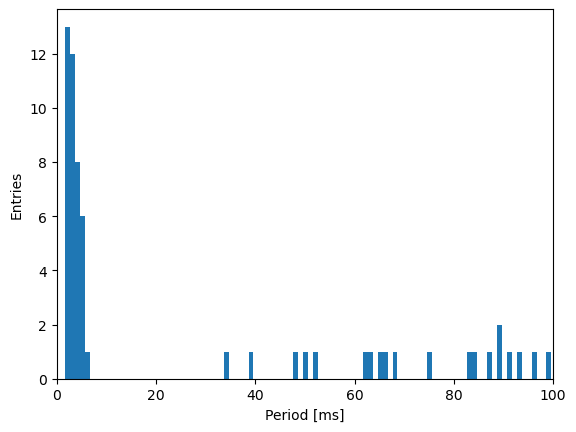

In [9]:
#How many pulsars with period less than 20 milliseconds (Millisecond pulsars, MSPs) are in the catalog
#make 1ms bin size
period_range = np.max(evt_data['Period']) - np.min(evt_data['Period'])
bins = int(period_range/1)
energy_hist = plt.hist(evt_data['Period'], bins)
plt.xlim([0, 100])
plt.xlabel("Period [ms]")
plt.ylabel("Entries")

# Count the number of events less than 20 of 'Period'
count = np.sum(evt_data['Period'] < 20)
print("pulsars with period less than 20 milliseconds is ", count)

save_fig = os.path.join(results_dir, 'Period.png')
plt.savefig(save_fig)

### Plot the sky distribution

Can you plot the sky distriution in galactic coordinates (GLAT, GLON)? You can use the Aitoff projections to make a fancier plot (See https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/geo_demo.html).
Can you plot with 2 different colors the pulsars with periods greater than 10 milliseconds and the MSPs?


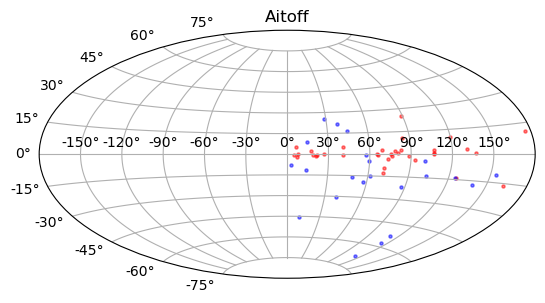

In [10]:
#period greater than 10 milliseconds
non_MSPs_data = evt_data[(evt_data['Period'] >= 10)]
#period less than 10 milliseconds
MSPs_data = evt_data[(evt_data['Period'] < 10)]

plt.figure()
ax = plt.subplot(111, projection="aitoff")
ax.set_title("Aitoff")
ax.grid(True)

#plot data on Aitoff projection
ax.scatter(np.radians(non_MSPs_data['GLON']), np.radians(non_MSPs_data['GLAT']), c='red', s=5, alpha=0.5)
ax.scatter(np.radians(MSPs_data['GLON']), np.radians(MSPs_data['GLAT']), c='blue', s=5, alpha=0.5)

save_fig = os.path.join(results_dir, 'Aitoff_projection.png')
plt.savefig(save_fig)

### Plot some distributions

Of course, can you also plot histograms showing the luminosity distribution (also in log scale, or the period (also in log scale)?

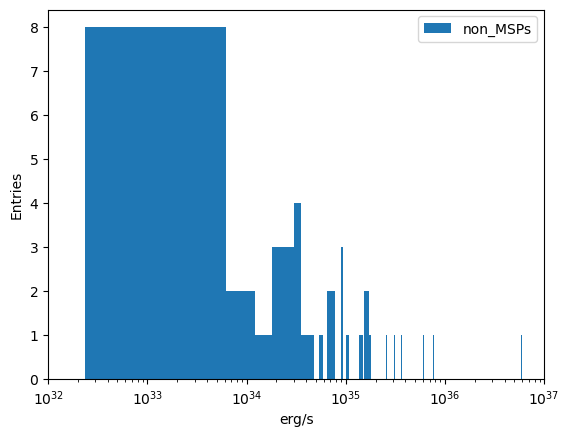

In [12]:
hist_1 = plt.hist(non_MSPs_data['Luminosity'], bins=1000)
plt.xlim([1e+32, 10.0e+36])
plt.xlabel("erg/s")
plt.ylabel("Entries")
plt.plot(label='non_MSPs')
plt.xscale('log')
plt.legend(['non_MSPs'], loc="upper right")
save_fig = os.path.join(results_dir, ' luminosity.non_MSPs.png')
plt.savefig(save_fig)

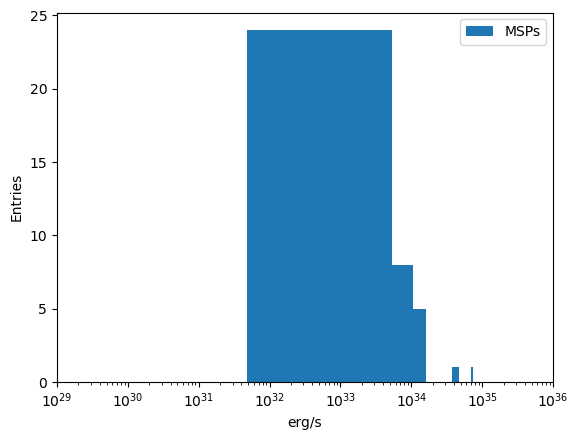

In [13]:
hist_2 = plt.hist(MSPs_data['Luminosity'], bins='auto')
plt.xlim([1e+29, 10.0e+35])
plt.xlabel("erg/s")
plt.ylabel("Entries")
plt.xscale('log')
plt.legend(['MSPs'], loc="upper right")
save_fig = os.path.join(results_dir, ' luminosity.MSPs.png')
plt.savefig(save_fig)

### Plot the P-Pdot diagram

Another very interesting plot is the scatter plot (in log scale) of the period (x axis) vs period first derivative (y axis). This P-Pdot diagram gives very useful information about the pulsars distribution, as you will see soon. Can you plot in this diagram, using 2 different colors for the MSPs and "regular" pulsars?

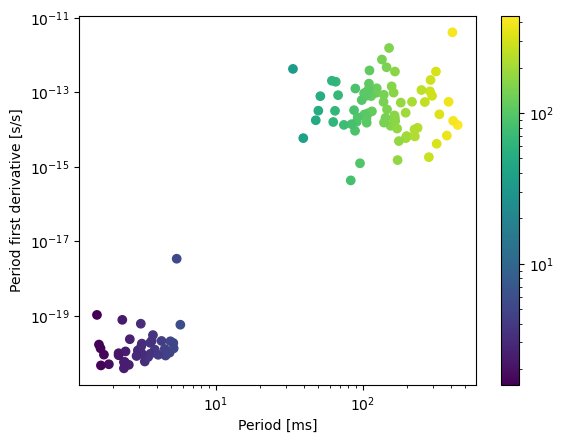

In [14]:
plt.scatter(evt_data['Period'], evt_data['P_Dot'], c=evt_data['Period'], cmap='viridis', norm=LogNorm())
cbar = plt.colorbar()

plt.xlabel('Period [ms]')
plt.ylabel('Period first derivative [s/s]')
plt.xscale('log')
plt.yscale('log')
save_fig = os.path.join(results_dir, 'P-Pdot_diagram.1.png')
plt.savefig(save_fig)

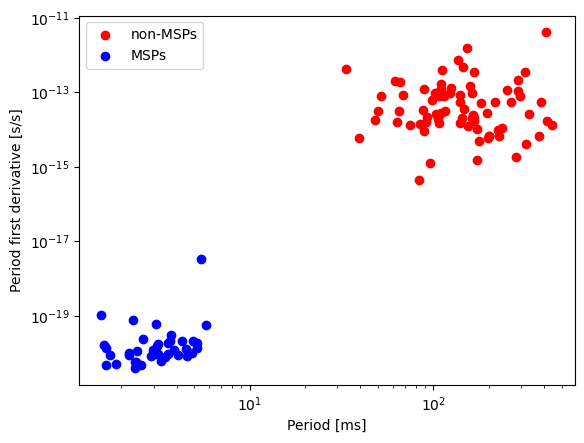

In [15]:
plt.scatter(non_MSPs_data['Period'], non_MSPs_data['P_Dot'], c='red', label='non-MSPs', cmap='viridis', norm=LogNorm())
plt.scatter(MSPs_data['Period'], MSPs_data['P_Dot'], c='blue', label='MSPs', cmap='viridis', norm=LogNorm())

plt.xlabel('Period [ms]')
plt.ylabel('Period first derivative [s/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Save in an output file
You can use the *plt.savefig* function to save the plots that you have done. Please remember to save in the "results" directory

In [16]:
save_fig = os.path.join(results_dir, 'P-Pdot_diagram.0.png')
plt.savefig(save_fig)

<Figure size 640x480 with 0 Axes>

### Final steps
Congratulations! Don't forget to save to Github (using git commit + git push)